In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [ ]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [ ]:
cuacaT=cuaca.transpose()
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
2024-09-08 12:40:00,25.05,90.53,1013.41,26.73,1.725799e+09,4.06
2024-09-08 12:40:59,25.03,90.51,1013.43,26.71,1.725799e+09,4.06
2024-09-08 12:41:59,25.07,90.54,1013.46,26.75,1.725799e+09,4.06
2024-09-08 12:43:00,25.06,90.53,1013.46,26.74,1.725799e+09,4.06
2024-09-08 12:43:59,25.06,90.56,1013.47,26.73,1.725799e+09,4.07
2024-09-08 12:45:00,25.02,90.59,1013.52,26.69,1.725800e+09,4.07
2024-09-08 12:45:59,25.00,90.59,1013.54,26.67,1.725800e+09,4.07
2024-09-08 12:46:59,25.05,90.65,1013.53,26.71,1.725800e+09,4.07
2024-09-08 12:48:00,25.05,90.63,1013.59,26.71,1.725800e+09,4.07
2024-09-08 12:48:59,25.03,90.61,1013.62,26.69,1.725800e+09,4.07


In [ ]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,379351.000000,379352.000000,379352.000000,379352.000000,3.793520e+05,379352.000000
mean,25.043016,85.881016,1011.430561,27.812271,1.714111e+09,4.091887
std,1.514143,11.160772,2.853911,3.290357,6.780499e+06,0.030735
min,17.670000,0.000000,0.000000,0.020000,1.702297e+09,0.000000
25%,24.170000,77.230000,1010.170000,25.390000,1.708175e+09,4.070000
50%,25.110000,90.340000,1011.470000,26.900000,1.714224e+09,4.090000
75%,26.090000,94.920000,1012.780000,30.240000,1.719974e+09,4.120000
max,29.700000,99.580000,1016.530000,41.120000,1.725801e+09,4.170000


In [ ]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)

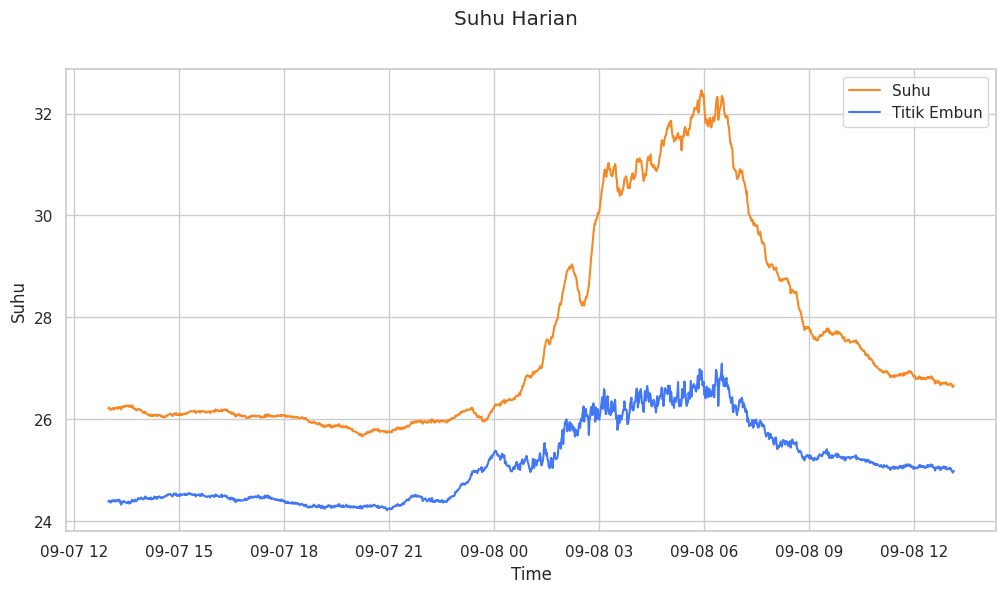

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
jam = 24
def plot_data(data, variable, color, label, last_n_points):
    """
    Plots a line chart for a specific variable.
    Parameters:
    - data (dict): A dictionary containing the data.
    - variable (str): The variable to plot.
    - color (str): The color of the line.
    - label (str): The label for the line in the legend.
    - last_n_points (int): The number of last points to plot.
    """
    plt.plot(data[variable].tail(last_n_points), color=color, label=label)

# Contoh penggunaan fungsi
plot_data(cuacaT, 'temperature', '#f68923', 'Suhu',60*jam)
plot_data(cuacaT, 'dew', '#4278f5', 'Titik Embun',60*jam)

# Menambahkan judul dan label sumbu
plt.suptitle("Suhu Harian")
plt.xlabel('Time')
plt.ylabel('Suhu')

# Menambahkan legenda
plt.legend()

# Menyimpan gambar ke file 'grafik_Suhu.png'
plt.savefig('grafik_Suhu.png')

# Menampilkan plot
plt.show()

In [ ]:
import plotly.graph_objects as go

temperature = cuacaT['temperature'].tail(60*jam)
humidity = cuacaT['humidity'].tail(60*jam)
pressure = cuacaT['pressure'].tail(60*jam)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temperature,
    y=humidity,
    z=pressure,
    mode='markers',
    marker=dict(
        size=5,
        color=temperature,              # Color by temperature
        colorscale='Viridis',           # Colormap
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Humidity (%)',
        zaxis_title='Pressure (hPa)'
    ),
    title='3D Scatter Plot of Temperature, Humidity, and Pressure'
)

# Show the plot
fig.show()


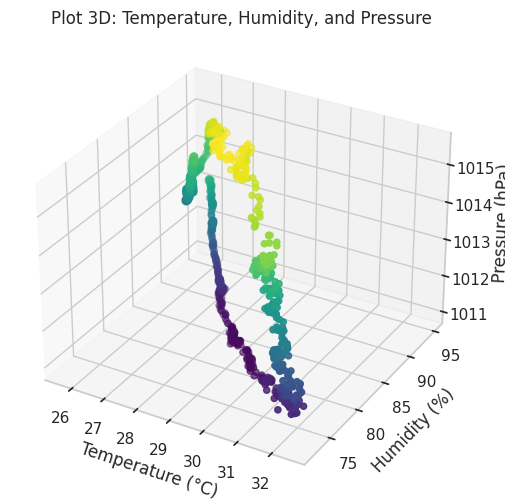

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = temperature = cuacaT['temperature'].tail(60*jam)
y = humidity = cuacaT['humidity'].tail(60*jam)
z = pressure = cuacaT['pressure'].tail(60*jam)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Pressure (hPa)')

# Add a title
ax.set_title('Plot 3D: Temperature, Humidity, and Pressure')

# Show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>